In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#ccdata = pd.read_excel("Credit Card Data.xlsx").convert_dtypes()
#ccdata.index += 1
customer = pd.read_csv("Customer Acqusition.csv").convert_dtypes()
customer.index += 1
repayment = pd.read_csv("Repayment.csv").convert_dtypes()
repayment.index += 1
spend = pd.read_csv("spend.csv").convert_dtypes()
spend.index += 1

In [7]:
#ccdata.drop(columns='No', inplace=True)
customer.drop(columns='No',inplace=True)
repayment.drop(columns={'SL No:','Unnamed: 4'},inplace=True)
spend.drop(columns='Sl No:',inplace=True)

In [25]:
#print(ccdata.dtypes)
print(customer.dtypes)
print(repayment.dtypes)
print(spend.dtypes)


Customer    string[python]
Age                  int32
City        string[python]
Product     string[python]
Limit                Int64
Company     string[python]
Segment     string[python]
dtype: object
Customer    string[python]
Age                  Int64
City        string[python]
Product     string[python]
Limit                Int64
Company     string[python]
Segment     string[python]
dtype: object
Customer    string[python]
Month       datetime64[ns]
Amount             Float64
dtype: object
Customer    string[python]
Month       datetime64[ns]
Type        string[python]
Amount             Float64
dtype: object


In [5]:
#ccdata['Age']=ccdata['Age'].astype(int)

In [10]:
repayment['Month']=pd.to_datetime(repayment['Month'])
spend['Month']=pd.to_datetime(spend['Month'])

C:\Users\karpi\AppData\Local\Temp\ipykernel_12604\404343101.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month']=pd.to_datetime(spend['Month'])


In [15]:
#ccdata.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [16]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [17]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [13]:
repayment.dropna(inplace=True)

In [18]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [28]:
#Answer 1a:
customer['Age']=np.where(customer.Age<18,customer.Age.mean(),customer.Age)

In [33]:
#Answer 1b:
cust_spend = spend.merge(customer,on = "Customer",how='left')
cust_spend['Amount']=np.where(cust_spend.Amount>cust_spend.Limit,cust_spend.Amount/2,cust_spend.Amount)

In [34]:
#Answer 1c:
cust_repay = repayment.merge(customer,on = "Customer",how='left')
cust_repay['Amount']=np.where(cust_repay.Amount>cust_repay.Limit,cust_repay.Limit,cust_repay.Amount)

In [45]:
#Answer 2a:
print("distinct customers are : ",cust_repay['Customer'].nunique())

distinct customers are :  100


In [46]:
#Answer 2b:
print("distinct categories are : ",cust_repay['Segment'].nunique())

distinct categories are :  5


In [56]:
#Answer 2c:
round(spend.groupby(spend.Month.dt.month)['Amount'].mean(),0)

Month
1     256221.0
2     233037.0
3     246256.0
4     236672.0
5     241277.0
6     241329.0
7     268042.0
8     236056.0
9     219370.0
10    215352.0
11    249100.0
12    208987.0
Name: Amount, dtype: Float64

In [57]:
#Answer 2d:
round(repayment.groupby(spend.Month.dt.month)['Amount'].mean(),0)

Month
1     244402.0
2     258172.0
3     254893.0
4     247516.0
5     243373.0
6     244673.0
7     224554.0
8     243773.0
9     223082.0
10    264390.0
11    242931.0
12    265276.0
Name: Amount, dtype: Float64

In [62]:
#Answer 2e:
profit = spend.groupby(spend.Month.dt.month)['Amount'].sum()-repayment.groupby(repayment.Month.dt.month)['Amount'].sum()
profit[profit>0].sum()*.029

583784.7322899998

In [75]:
#Answer 2f:
spend.groupby('Type')['Amount'].sum().sort_values(ascending=False).index[0:5]

Index(['PETRO', 'CAMERA', 'FOOD', 'TRAIN TICKET', 'AIR TICKET'], dtype='string', name='Type')

In [73]:
#Answer 2g:
cust_spend.groupby('City')['Amount'].sum().sort_values(ascending=False).index[0]

'COCHIN'

In [78]:
#Answer 2h:
mybin = [0,7,12,18,25,35,45,60,70,80,100]
mybin_label = ['0-7','7-12','12-18','18-25','25-35','35-45','45-60','60-70','70-80','80-100']

cust_spend['Age_Grp']=pd.cut(cust_spend['Age'],bins=mybin,labels=mybin_label)

cust_spend.groupby('Age_Grp')['Amount'].sum().sort_values(ascending=False).index[0]

'45-60'

In [79]:
#Answer 2i:
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).index[0:10]


Index(['A61', 'A60', 'A13', 'A43', 'A45', 'A12', 'A14', 'A44', 'A39', 'A42'], dtype='string', name='Customer')

Product       Gold                                   Platimum                
Month             2004         2005         2006         2004         2005   
City                                                                         
BANGALORE   9289878.54  12892362.99  12030611.09  3204736.365  4038229.825  \
BOMBAY      6987853.53   8983018.28   7917144.31   2678414.22   2577931.21   
CALCUTTA    7477140.98   10303355.8  11167532.77  3914422.865   6479983.42   
CHENNAI      1059618.5   3740945.58   2704288.62   4529612.53  6928695.875   
COCHIN      7315850.15  12110613.03  10499142.38   5741362.15  7673817.265   
DELHI        2806495.0   1964845.27   2957103.32   824353.395   1106318.76   
PATNA        2072567.9   3252615.77   2276181.69    1113069.6   2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87   2944053.77  5359099.325   

Product                     Silver                              
Month              2006         2004         2005         2006  
City       

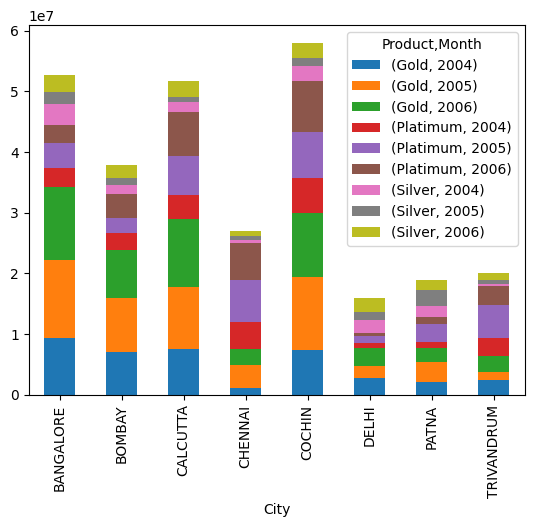

In [86]:
#Answer 3:
import matplotlib.pyplot as plt
abc = pd.pivot_table(data=cust_spend,values='Amount',columns=['Product',cust_spend.Month.dt.year],index='City',aggfunc='sum')
print(abc)
abc.plot(kind='bar',stacked="True")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

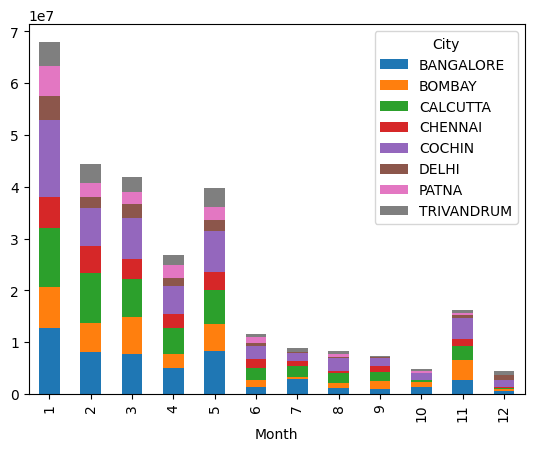

In [88]:
#Answer 4a:
pd.pivot_table(cust_spend,index=cust_spend.Month.dt.month,columns='City',values="Amount",aggfunc='sum').plot(kind='bar',stacked='True')
plt.show

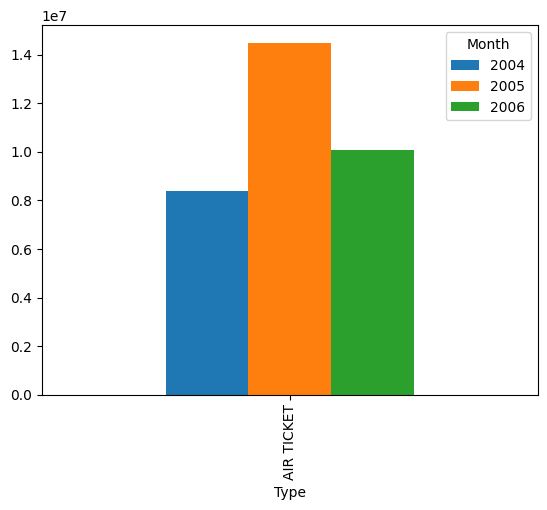

In [93]:
#Answer 4b:
pd.pivot_table(data=spend[spend['Type']=='AIR TICKET'],values='Amount',columns=spend.Month.dt.year,index='Type',aggfunc='sum').plot(kind='bar')
plt.show()

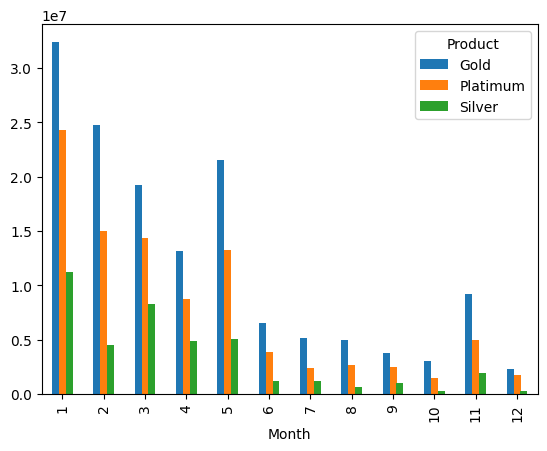

In [90]:
#Answer 4c:
pd.pivot_table(data=cust_spend,index=cust_spend.Month.dt.month, columns='Product',values='Amount',aggfunc='sum').plot(kind='bar')
plt.show()

In [95]:
product= input('Enter product Gold/Silver/Platinum : ')
time_period = input('Enter time period monthly/yearly : ')
def my_func(data,prod,time):
    print(product,time_period)
    if time=='Yearly':
        return pd.pivot_table(data=data[data['Product']==prod],index=['Customer','City',data.Month.dt.year],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).iloc[0:10]
    elif time=='Monthly':
        return pd.pivot_table(data=data[data['Product']==prod],index=['Customer','City',data.Month.dt.month],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).iloc[0:10]

print(my_func(cust_repay,product,time_period))

Silver Yearly
                               Amount
Customer City       Month            
A24      DELHI      2005   1184870.98
A22      BOMBAY     2005   1141542.81
A46      PATNA      2005   1116730.89
A25      COCHIN     2006      1000030
A23      BANGALORE  2005      1000010
A57      TRIVANDRUM 2004      1000010
A22      BOMBAY     2004    953419.47
                    2006    945271.83
A23      BANGALORE  2006    872925.32
A46      PATNA      2006    839228.07
